In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def plot_u_m_style_grid(m0=0.2, n0=1.0, base_dir="dissertation_plain", times=[70, 140, 280]):
    lambda_vals = [0.1, 0.2, 0.5, 0.8, 1.0, 2, 5, 10]
    fig, axes = plt.subplots(2, 4, figsize=(20, 9), sharex=True, sharey=True)
    axes = axes.flatten()

    legend_lines = []
    legend_labels = []
    cmap = plt.get_cmap("tab10")

    for i, lam in enumerate(lambda_vals):
        fname = f"lambda_{lam:.2f}_m0_{m0:.2f}_n0_{n0:.2f}.npz"
        path = os.path.join(base_dir, fname)
        ax = axes[i]

        if not os.path.exists(path):
            ax.set_title(f"λ = {lam:.2f}\n❌ Missing", fontsize=14)
            continue

        data = np.load(path)
        x = data["x"]
        t = data["t"]
        N_arr = data["N_arr"]
        M_arr = data["M_arr"]
        speed = data.get("wave_speed", None)

        for j, tt in enumerate(times):
            idx = np.argmin(np.abs(t - tt))
            color = cmap(j)

            line_n, = ax.plot(x, N_arr[idx], label=f"$t$ = {int(t[idx])}", color=color, linewidth=3)
            ax.plot(x, M_arr[idx], linestyle='--', color=color, linewidth=3, alpha=0.6)

            if i == 0:
                legend_lines.append(line_n)
                legend_labels.append(f"$t$ = {int(t[idx])}")

        ax.set_title(rf"$\lambda = {lam:.2f}$", fontsize=17, fontweight="bold")

        if speed is not None:
            ax.text(30, 0.93, rf"$c = {speed:.3f}$", fontsize=15, color='black')

        ax.set_xlim([0, 1000])
        ax.set_ylim([0, 1.05])
        ax.tick_params(axis='both', labelsize=13)
        ax.grid(True)

    for ax in axes[:4]:
        ax.set_xlabel(r"$x$", fontsize=15)
    for ax in axes[::4]:
        ax.set_ylabel(r"$u(x,t),\, m(x,t)$", fontsize=15)

    fig.legend(legend_lines, legend_labels,
               loc='lower center', ncol=len(times),
               fontsize=14, frameon=True, bbox_to_anchor=(0.5, -0.02))

    fig.suptitle(rf"Tumour and ECM Profiles for $m_0$ = {m0}, $n_0$ = {n0}", fontsize=20)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

def plot_speed_vs_log_lambda(base_dir="dissertation_plain", n0_fixed=1.0):
    lambda_vals = [0.1, 0.2, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0]
    m0_vals     = [0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0]

    plt.figure(figsize=(6, 4))

    for m0 in m0_vals:
        speeds = []
        for lam in lambda_vals:
            fname = f"lambda_{lam:.2f}_m0_{m0:.2f}_n0_{n0_fixed:.2f}.npz"
            path = os.path.join(base_dir, fname)

            if os.path.exists(path):
                data = np.load(path)
                speed = data.get("wave_speed", np.nan)
            else:
                speed = np.nan

            speeds.append(speed)

        log_lambda = np.log10(lambda_vals)
        plt.plot(log_lambda, speeds, label=rf"$m_0 = {m0}$")  # Let matplotlib pick the color

    plt.xlabel(r"$\log_{10}(\lambda)$", fontsize=13)
    plt.ylabel(r"$c_{\mathrm{min}}$", fontsize=13)
    plt.title("Wave Speed vs Diffusion Rate", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11, title="$m_0$")
    plt.tight_layout()
    plt.show()

def plot_speed_vs_log_lambda_grid(base_dir="dissertation_plain"):
    lambda_vals = [0.1, 0.2, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0]
    m0_vals     = [0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0]
    n0_vals     = [0.1, 0.2, 0.5, 0.8, 0.9, 1.0]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, n0 in enumerate(n0_vals):
        ax = axes[i]
        for m0 in m0_vals:
            speeds = []
            for lam in lambda_vals:
                fname = f"lambda_{lam:.2f}_m0_{m0:.2f}_n0_{n0:.2f}.npz"
                path = os.path.join(base_dir, fname)

                if os.path.exists(path):
                    data = np.load(path)
                    speed = data.get("wave_speed", np.nan)
                else:
                    speed = np.nan

                speeds.append(speed)

            log_lambda = np.log10(lambda_vals)
            ax.plot(log_lambda, speeds, label=rf"$m_0 = {m0}$")  # No need for color

        ax.set_title(rf"$n_0 = {n0}$", fontsize=16)
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.tick_params(axis='both', labelsize=12)

        if i // 3 == 1:
            ax.set_xlabel(r"$\log_{10}(\lambda)$", fontsize=14)
        if i % 3 == 0:
            ax.set_ylabel(r"Wave speed $c$", fontsize=14)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title=r"$m_0$", loc='lower center', ncol=8, fontsize=12, frameon=True)
    fig.suptitle("Wave Speed vs Log Lambda Across Varying $n_0$", fontsize=18)
    plt.tight_layout(rect=[0, 0.06, 1, 0.95])
    plt.show()

def plot_plain_heatmap_grid(base_dir="dissertation_plain"):
    lambda_vals = [0.1, 0.2, 0.5, 0.8, 1.0, 2, 5, 10]
    m0_vals     = [0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0]
    n0_vals     = [0.1, 0.2, 0.5, 0.8, 0.9, 1.0]

    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    axes = axes.flatten()

    for idx, n0 in enumerate(n0_vals):
        speed_grid = np.full((len(m0_vals), len(lambda_vals)), np.nan)

        for i, m0 in enumerate(m0_vals):
            for j, lam in enumerate(lambda_vals):
                fname = f"lambda_{lam:.2f}_m0_{m0:.2f}_n0_{n0:.2f}.npz"
                path = os.path.join(base_dir, fname)
                if os.path.exists(path):
                    data = np.load(path)
                    speed = data.get("wave_speed", np.nan)
                    speed_grid[i, j] = speed

        ax = axes[idx]
        im = ax.imshow(speed_grid, origin='lower', cmap="viridis",
                       extent=[min(lambda_vals), max(lambda_vals),
                               min(m0_vals), max(m0_vals)],
                       aspect='auto')
        ax.set_title(rf"$n_0 = {n0:.2f}$", fontsize=16, fontweight="bold")
        ax.set_xlabel(r"$\lambda$", fontsize=14)
        ax.set_ylabel(r"$m_0$", fontsize=14)
        ax.tick_params(labelsize=12)

        # Colorbar for each subplot
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label(r"Wave speed $c$", fontsize=13)
        cbar.ax.tick_params(labelsize=11)

    plt.suptitle(r"Wave Speed Heatmaps for Chloe Plain Model", fontsize=22, y=1.02)
    plt.tight_layout()
    plt.show()

def plot_speed_vs_m0_fixed_lambda(base_dir="dissertation_plain", lambda_fixed=1.0, n0_vals=[1.0]):
    m0_vals = [0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1.0]
    plt.figure(figsize=(7, 5))

    for n0 in n0_vals:
        speeds = []
        valid_m0 = []

        for m0 in m0_vals:
            fname = f"lambda_{lambda_fixed:.2f}_m0_{m0:.2f}_n0_{n0:.2f}.npz"
            path = os.path.join(base_dir, fname)

            if os.path.exists(path):
                data = np.load(path)
                c = data.get("wave_speed", np.nan)
                if not np.isnan(c):
                    valid_m0.append(m0)
                    speeds.append(c)

        if speeds:
            plt.plot(valid_m0, speeds, '-o', label=rf"$n_0 = {n0}$", linewidth=2)

    plt.xlabel(r"Initial ECM density $m_0$", fontsize=14)
    plt.ylabel(r"Wave speed $c$", fontsize=14)
    plt.title(rf"Wave Speed vs $m_0$ at $\lambda = {lambda_fixed}$", fontsize=16)
    plt.grid(True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

def plot_speed_vs_lambda_fixed_m0(base_dir="dissertation_plain", m0_fixed=0.2, n0_vals=[0.1, 0.2, 0.5, 0.8, 0.9, 1.0]):
    lambda_vals = [0.1, 0.2, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0]
    plt.figure(figsize=(7, 5))

    for n0 in n0_vals:
        speeds = []
        valid_lambda = []

        for lam in lambda_vals:
            fname = f"lambda_{lam:.2f}_m0_{m0_fixed:.2f}_n0_{n0:.2f}.npz"
            path = os.path.join(base_dir, fname)

            if os.path.exists(path):
                data = np.load(path)
                c = data.get("wave_speed", np.nan)
                if not np.isnan(c):
                    valid_lambda.append(lam)
                    speeds.append(c)

        if speeds:
            plt.plot(valid_lambda, speeds, '-o', label=rf"$n_0 = {n0}$", linewidth=2)

    plt.xlabel(r"Diffusion rate $\lambda$", fontsize=14)
    plt.ylabel(r"Wave speed $c$", fontsize=14)
    plt.title(rf"Wave Speed vs $\lambda$ at $m_0 = {m0_fixed}$", fontsize=16)
    plt.grid(True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

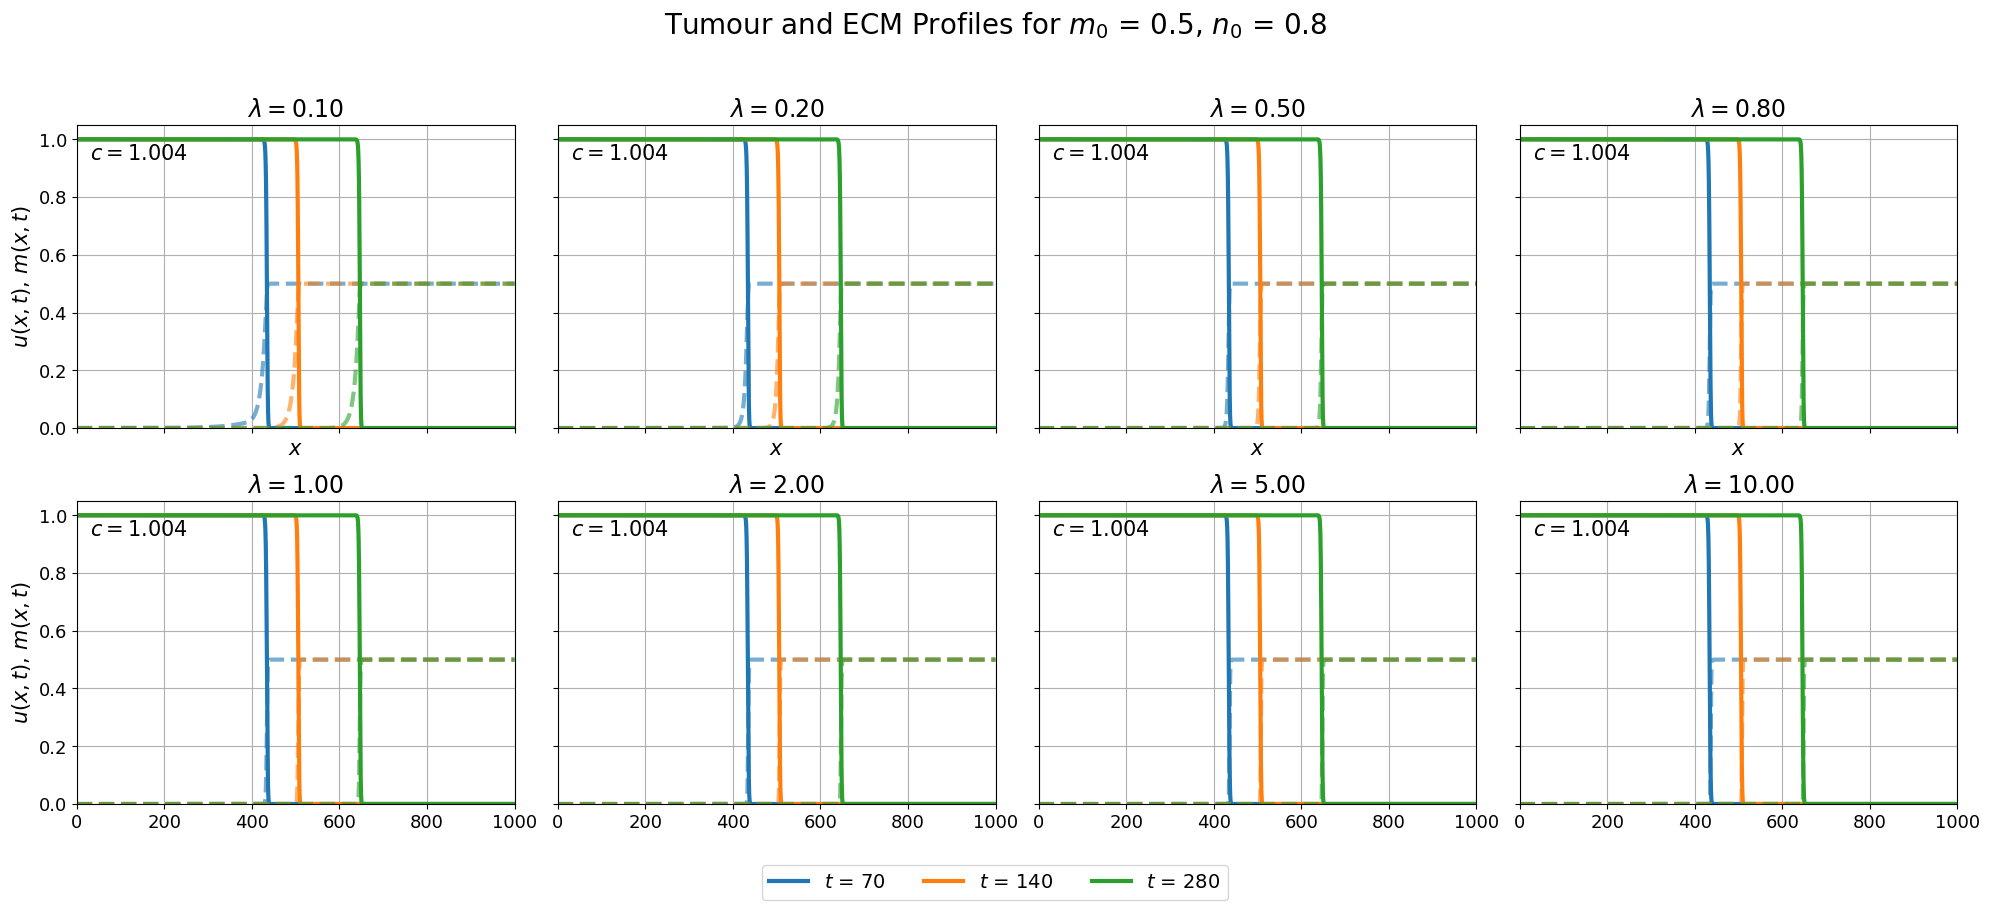

In [3]:
plot_u_m_style_grid(m0=0.5, n0=0.8)

/var/folders/db/nfyhgnf50fxd8qjfrpdb671c0000gn/T/ipykernel_21085/3411425216.py:57: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
/Users/chamundeshwarivadamalai/Desktop/Oxford/Dissertation/Main/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


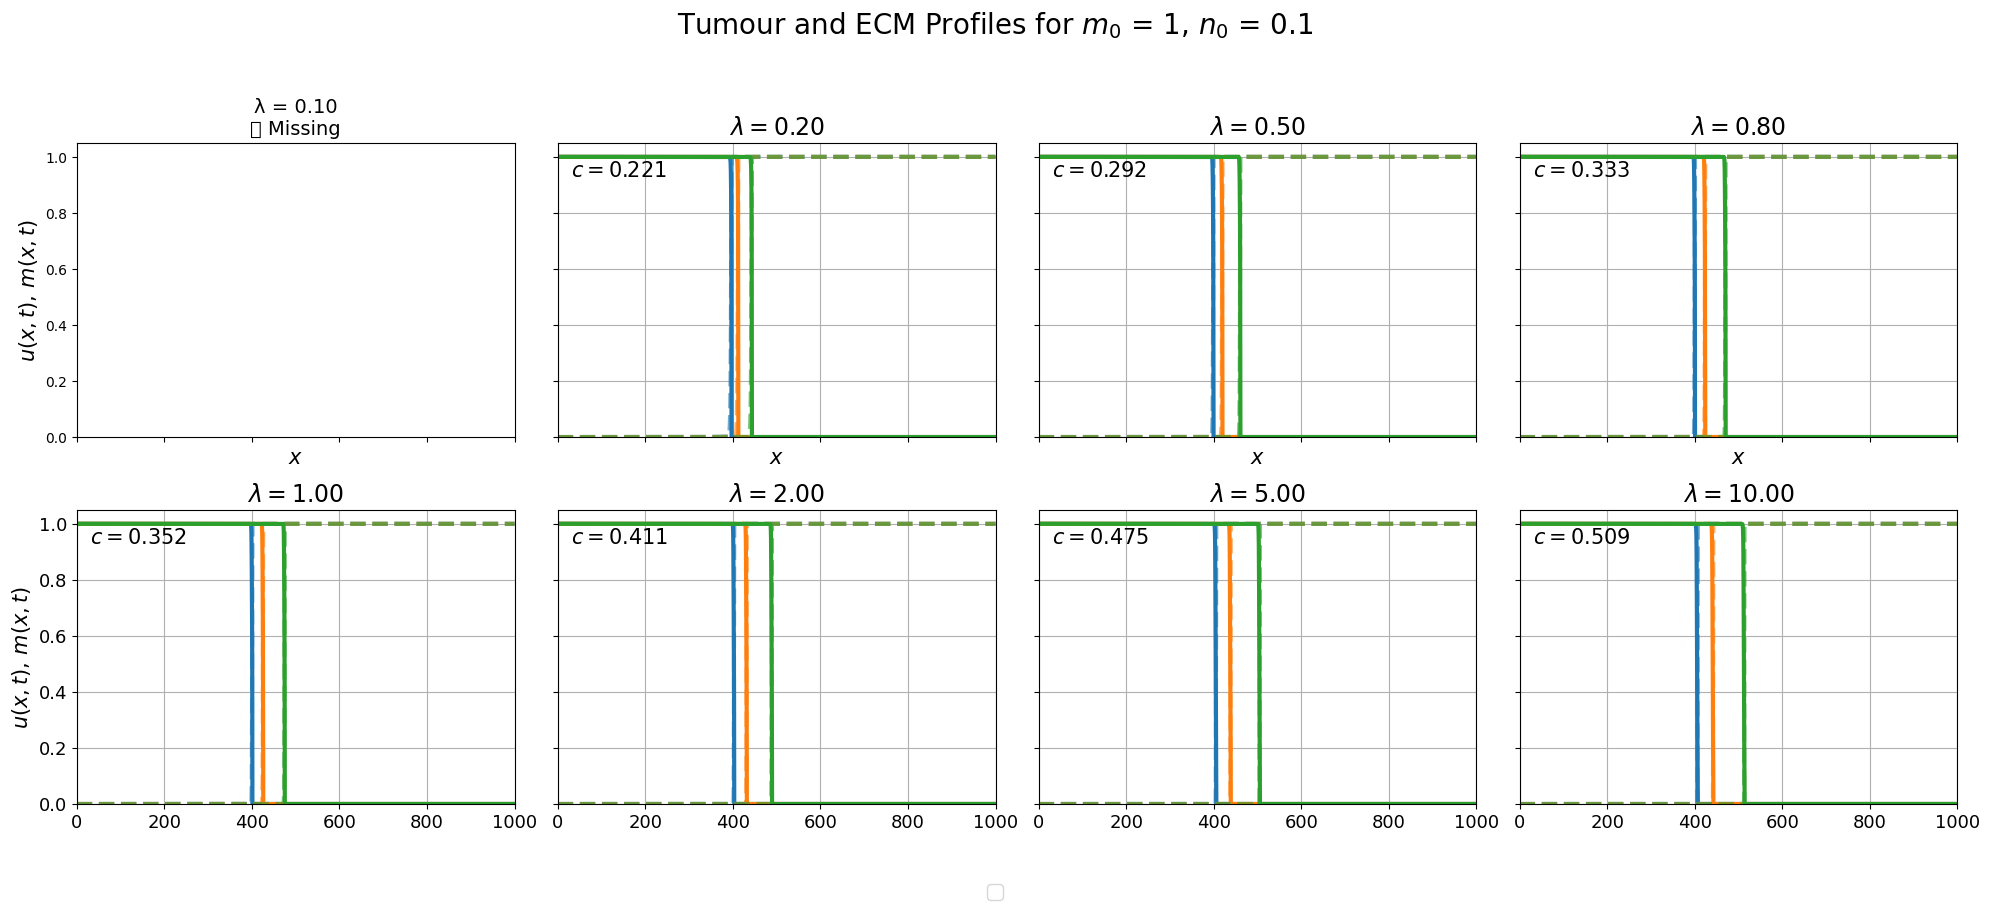

In [5]:
plot_u_m_style_grid(m0=1, n0=0.1)

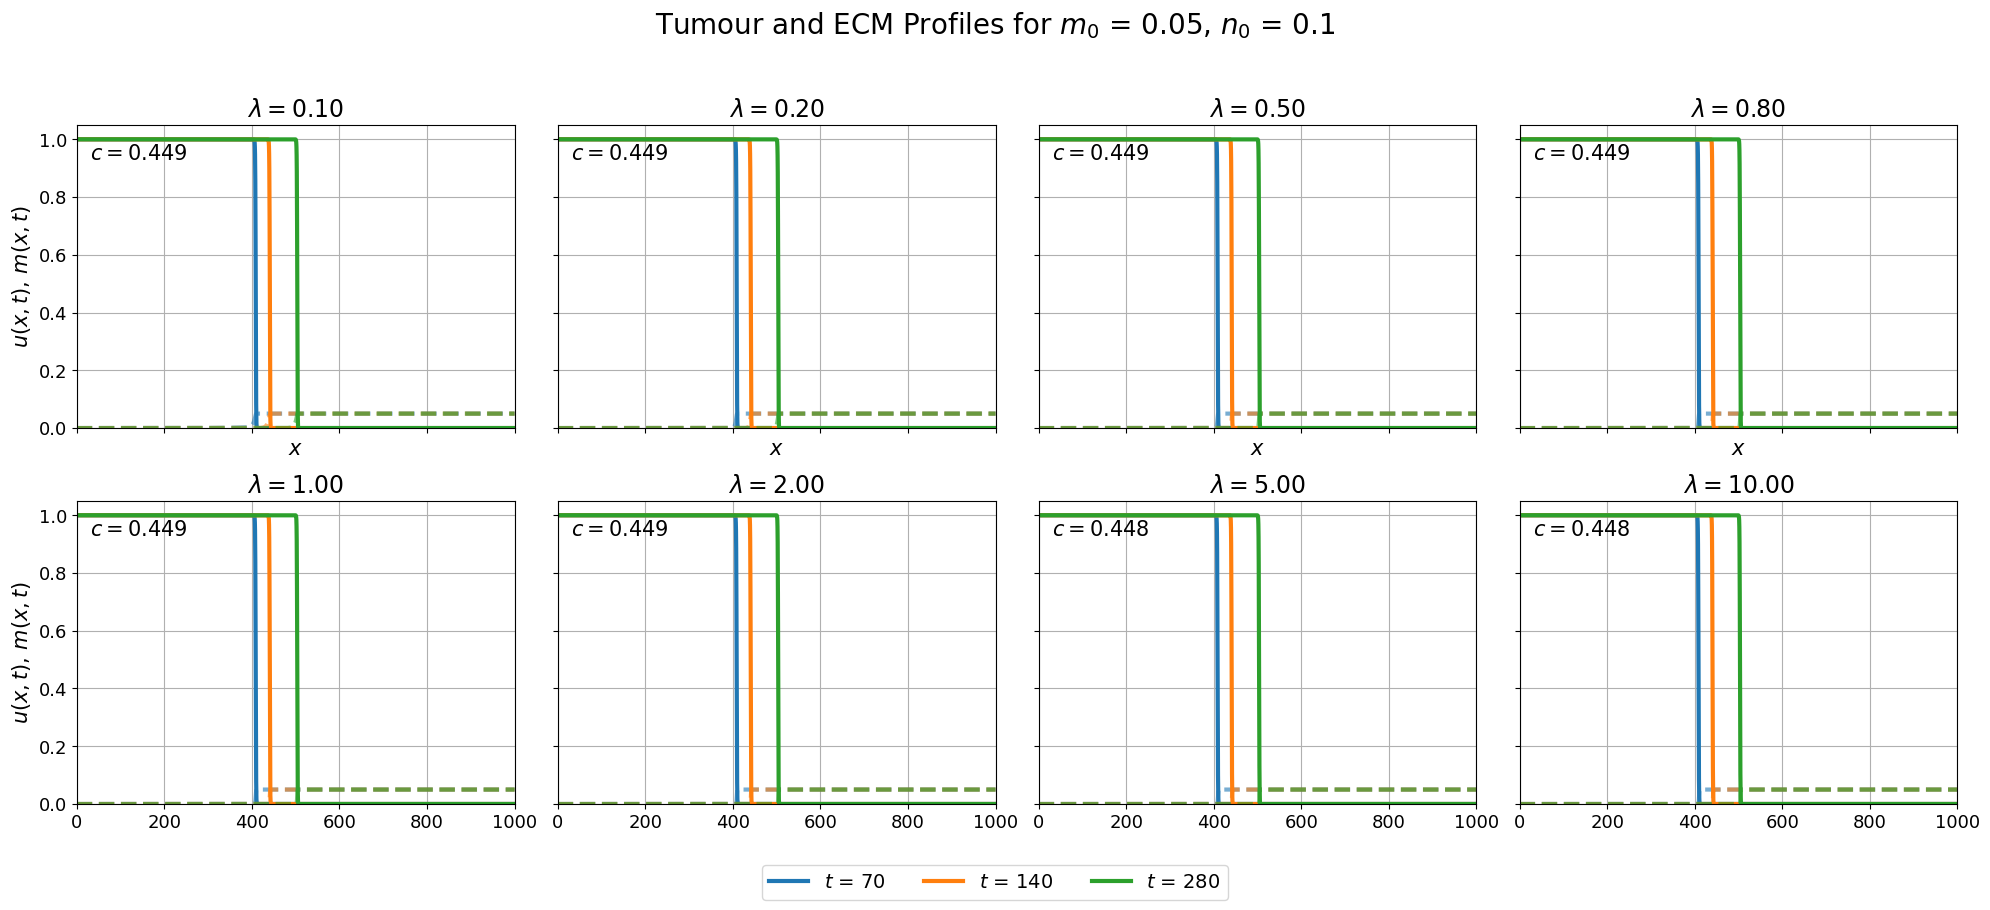

In [7]:
plot_u_m_style_grid(m0=0.05, n0=0.1)

/var/folders/db/nfyhgnf50fxd8qjfrpdb671c0000gn/T/ipykernel_21085/3411425216.py:57: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
/Users/chamundeshwarivadamalai/Desktop/Oxford/Dissertation/Main/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


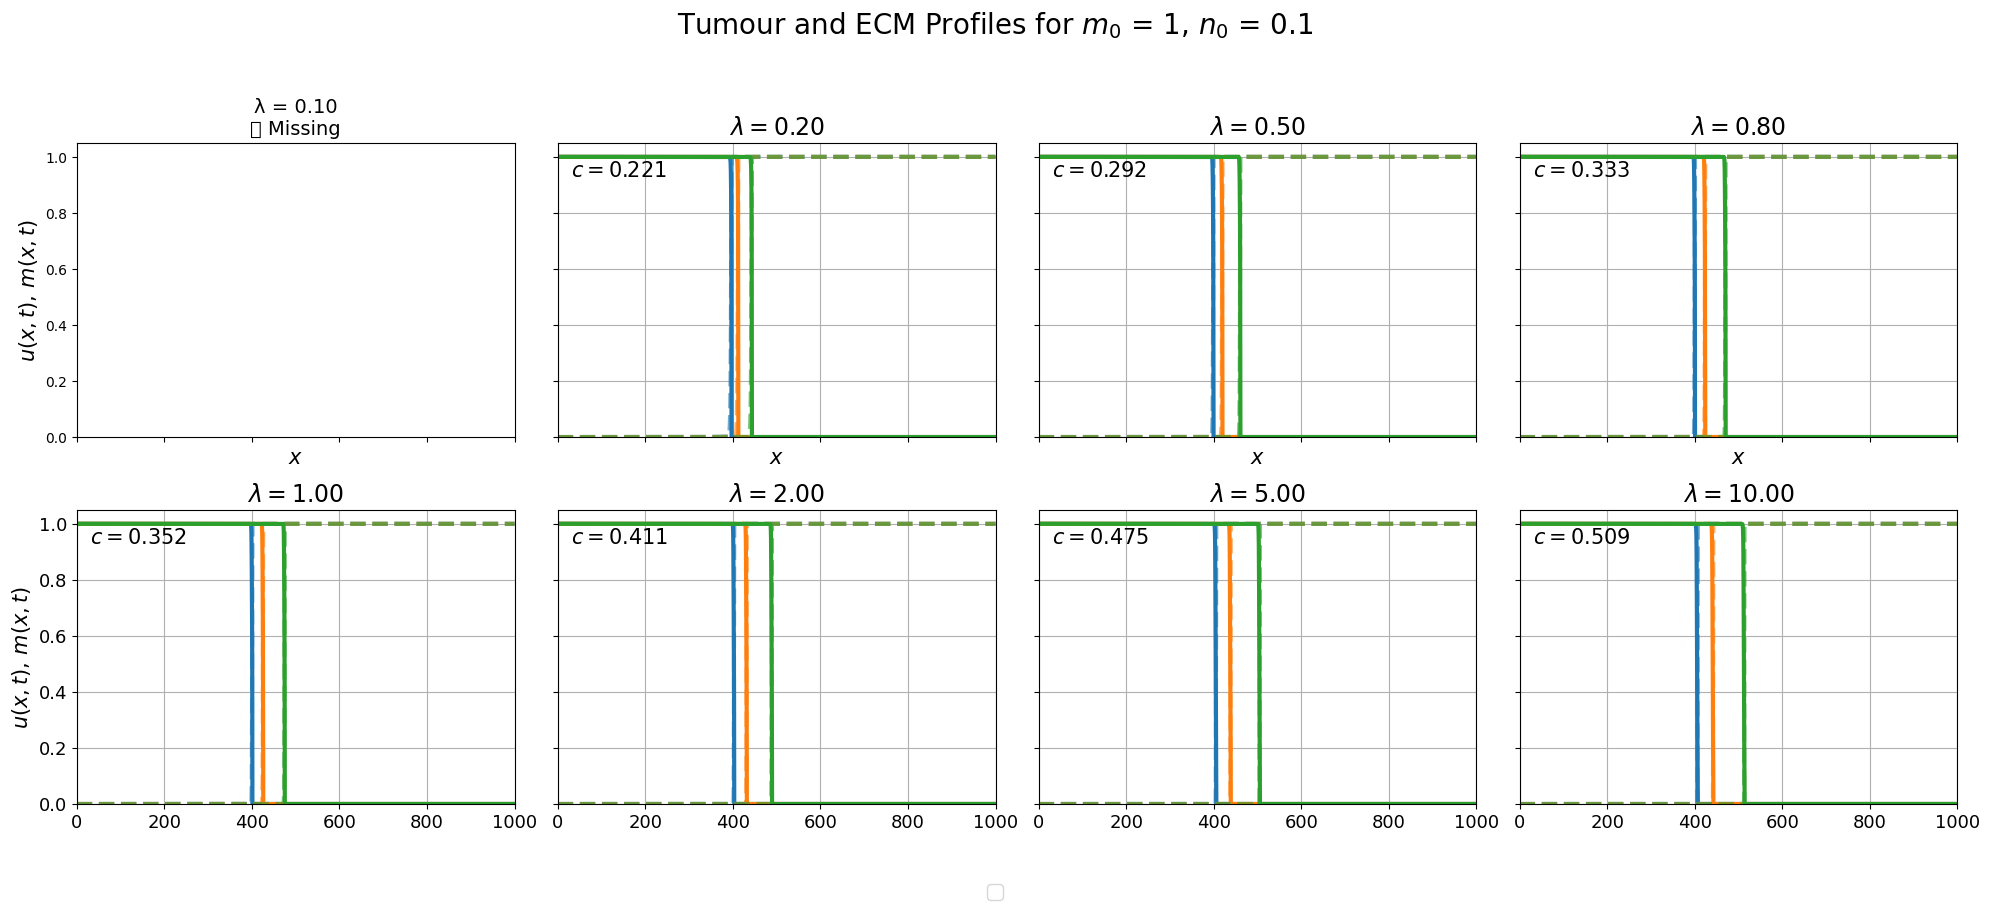

In [22]:
plot_u_m_style_grid(m0=1, n0=0.1)

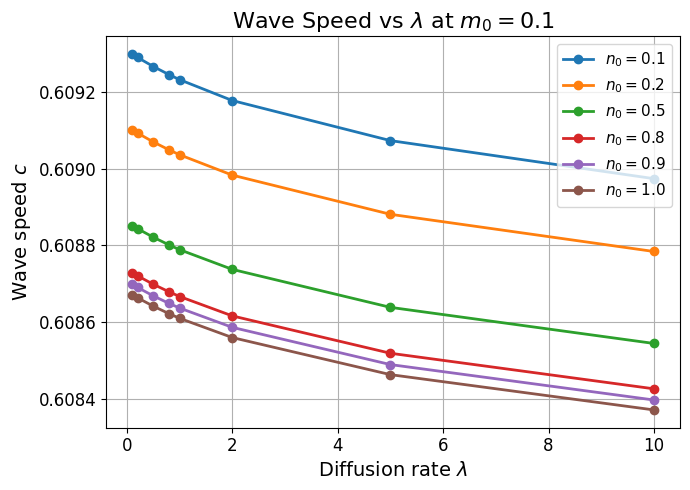

In [27]:
plot_speed_vs_lambda_fixed_m0(m0_fixed=0.1)

In [28]:
2*(0.1*0.9)**0.5

0.6000000000000001

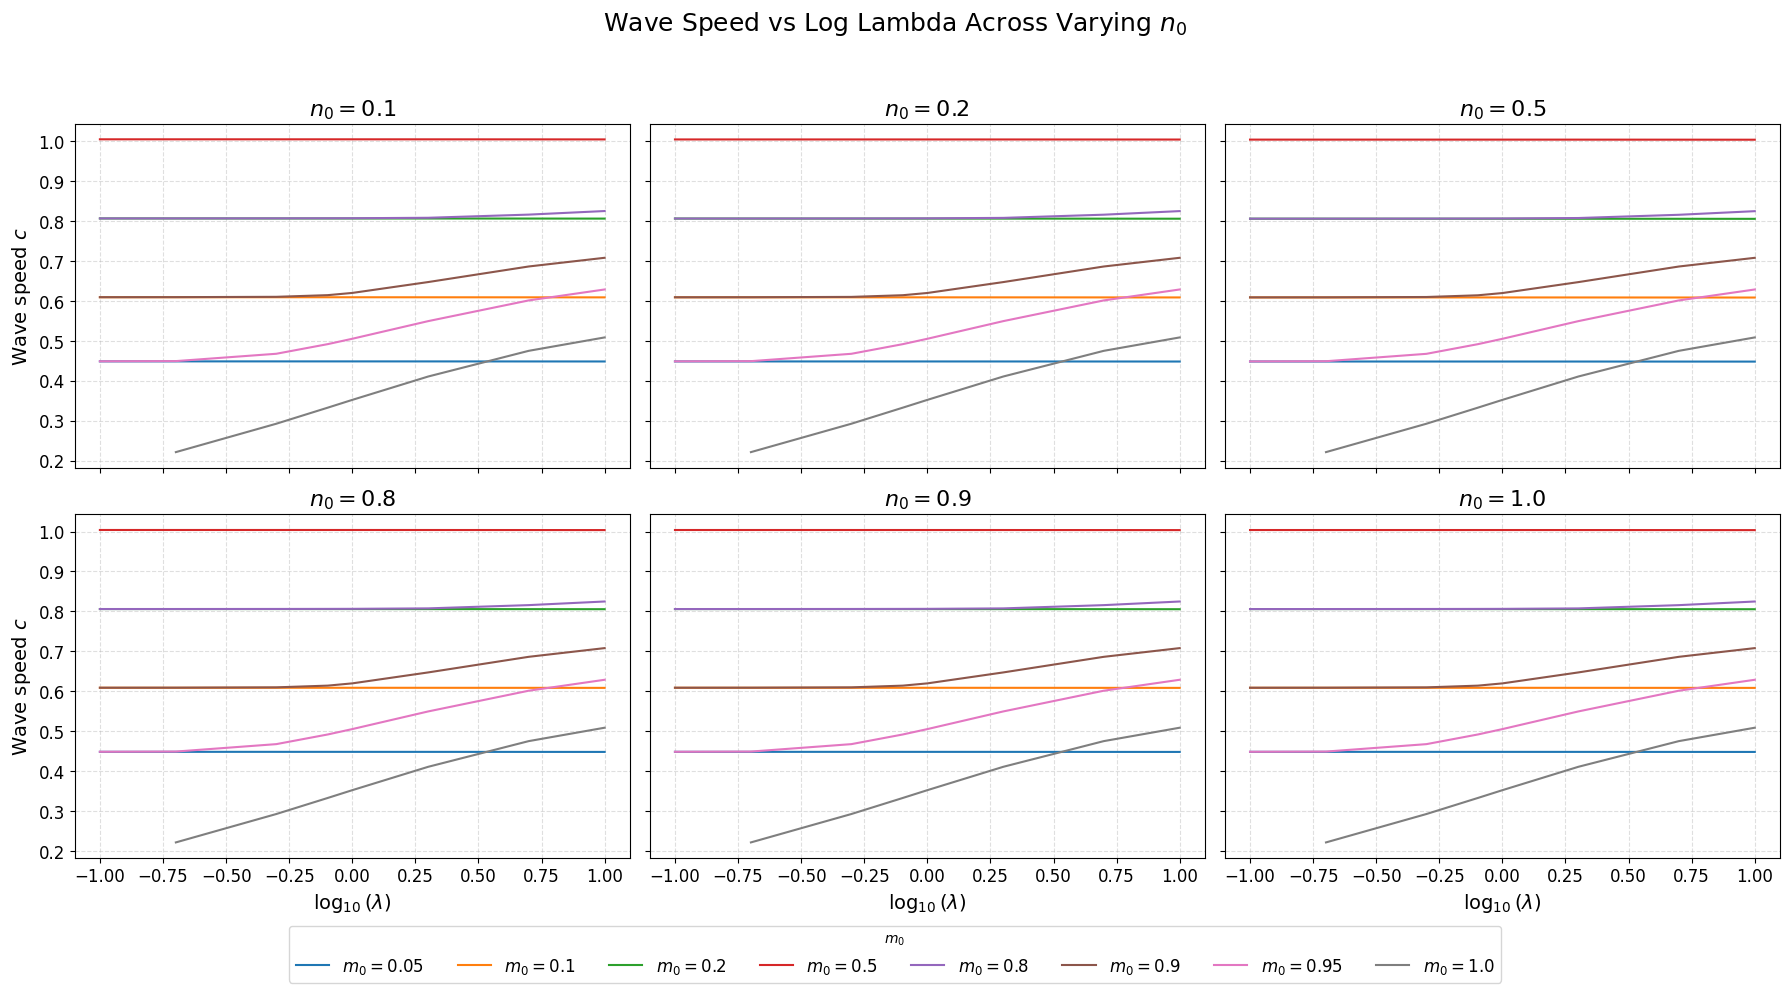

In [24]:
plot_speed_vs_log_lambda_grid()

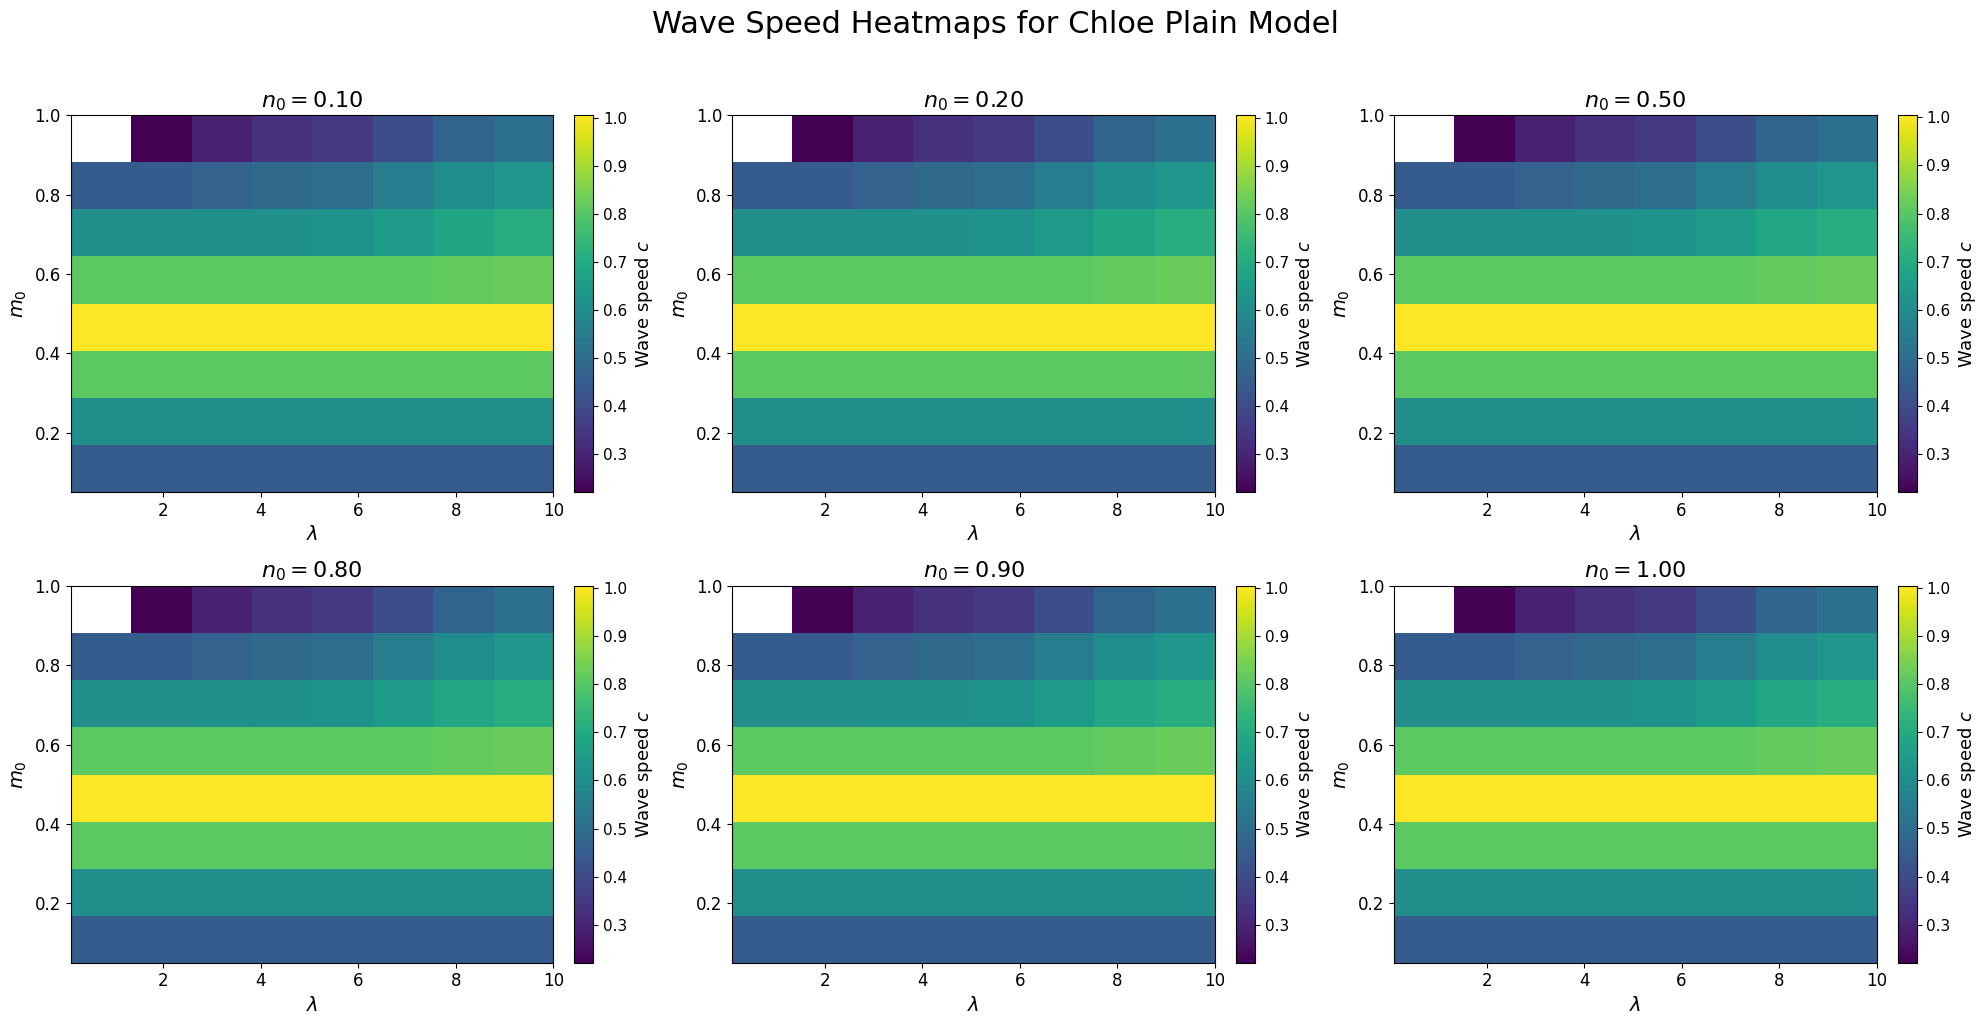

In [14]:
plot_plain_heatmap_grid()